In [ ]:
import spacy
from sklearn.metrics import classification_report

# Load your trained spaCy model
nlp = spacy.load("en_core_web_lg")

# Function to extract GPU, price, and RAM information from a sentence
def extract_info(sentence):
    """Preprocess the text using spaCy."""
    doc = nlp(sentence)
    # Extract price, RAM, and GPU information
    price = None
    ram = None
    gpu = None
    # Initialize variables to store the words between "and" and "GPU"
    words_between = []
    # Iterate through tokens in the document
    for i, token in enumerate(doc):
        # Check if the token text is 'price'
        if token.text.lower() == '$':
            # Check if the next token resembles a number
            if i + 1 < len(doc) and doc[i + 1].like_num:
                # Extract the numerical value of the next token
                price = float(doc[i + 1].text)
        elif token.text.lower() == 'gb':
            # Check if the next token resembles a number
            if i + 1 < len(doc) and doc[i - 1].like_num:
                # Extract the numerical value of the next token
                ram = int(doc[i - 1].text)

        # Check if the token text is 'nvidia' or 'amd'
        if token.text.lower() in ['nvidia', 'amd', 'intel']:
            words_between.append(token.text)
            for j in range(i + 1, len(doc)):
                if doc[j].text.lower() in [".", "and", "gpu", ","]:
                    break
                else:
                    words_between.append(doc[j].text)

    # Convert the list of words between 'and' and 'GPU' to a string
    gpu = ' '.join(words_between)
    return gpu, price, ram

# Evaluation dataset (list of tuples containing sentence and ground truth labels)
evaluation_data = [
    ("This laptop has an NVIDIA GeForce GTX 1660 Ti GPU, priced at $1200 with 16GB RAM.", ("NVIDIA GeForce GTX 1660 Ti", "1200.0", "16")),
    ("The laptop comes with an AMD Radeon RX 580 GPU, priced at $900 with 8GB of RAM.", ("AMD Radeon RX 580", "900.0", "8")),
    ("I need a laptop with 16GB RAM, AMD Radeon Pro 455 and with a price of $1500", ("AMD Radeon Pro 455", "1500.0", "16")),
    ("Looking for a laptop with NVIDIA GeForce RTX 3070 GPU, priced at $2000 with 32GB of RAM.", ("NVIDIA GeForce RTX 3070", "2000.0", "32")),
    ("This laptop features an Intel Iris Xe Graphics, priced at $1100 with 16GB RAM.", ("Intel Iris Xe Graphics", "1100.0", "16")),
    ("The laptop comes with an NVIDIA Quadro RTX 5000 GPU, priced at $2500 with 64GB of RAM.", ("NVIDIA Quadro RTX 5000", "2500.0", "64")),
    ("I want a laptop with AMD Radeon RX Vega 10 GPU, priced at $800 with 8GB RAM.", ("AMD Radeon RX Vega 10", "800.0", "8")),
    ("This laptop has an NVIDIA GeForce GTX 1650 Ti GPU, priced at $1500 with 32GB RAM.", ("NVIDIA GeForce GTX 1650 Ti", "1500.0", "32")),
    ("I'm interested in a laptop with NVIDIA GeForce GTX 1660 Ti GPU, priced at $1400 with 16GB RAM.", ("NVIDIA GeForce GTX 1660 Ti", "1400.0", "16")),
    ("The laptop comes with an AMD Radeon RX 580 GPU, priced at $900 with 8GB of RAM.", ("AMD Radeon RX 580", "900.0", "8")),
    ("This laptop has an Intel Iris Xe Graphics, priced at $1200 with 32GB RAM.", ("Intel Iris Xe Graphics", "1200.0", "32")),
    ("Looking for a laptop with NVIDIA Quadro RTX 5000 GPU, priced at $2500 with 64GB of RAM.", ("NVIDIA Quadro RTX 5000", "2500.0", "64")),
    ("I want a laptop with AMD Radeon RX 580 GPU, priced at $1000 with 16GB RAM.", ("AMD Radeon RX 580", "1000.0", "16")),
]

# Lists to store predicted and ground truth labels
predicted_labels = {"GPU": [], "PRICE": [], "RAM": []}
true_labels = {"GPU": [], "PRICE": [], "RAM": []}

# Iterate over evaluation dataset
for sentence, (true_gpu, true_price, true_ram) in evaluation_data:
    predicted_gpu, predicted_price, predicted_ram = extract_info(sentence)

    predicted_labels["GPU"].append(predicted_gpu)
    predicted_labels["PRICE"].append(predicted_price)
    predicted_labels["RAM"].append(predicted_ram)
    
    true_labels["GPU"].append(true_gpu)
    true_labels["PRICE"].append(float(true_price))
    true_labels["RAM"].append(int(true_ram))

# Compute classification report for GPU, price, and RAM extraction
for label in ["GPU", "PRICE", "RAM"]:
    print(f"Classification Report for {label}:")
    print(classification_report(true_labels[label], predicted_labels[label]))

Confusion Matrix for GPU:


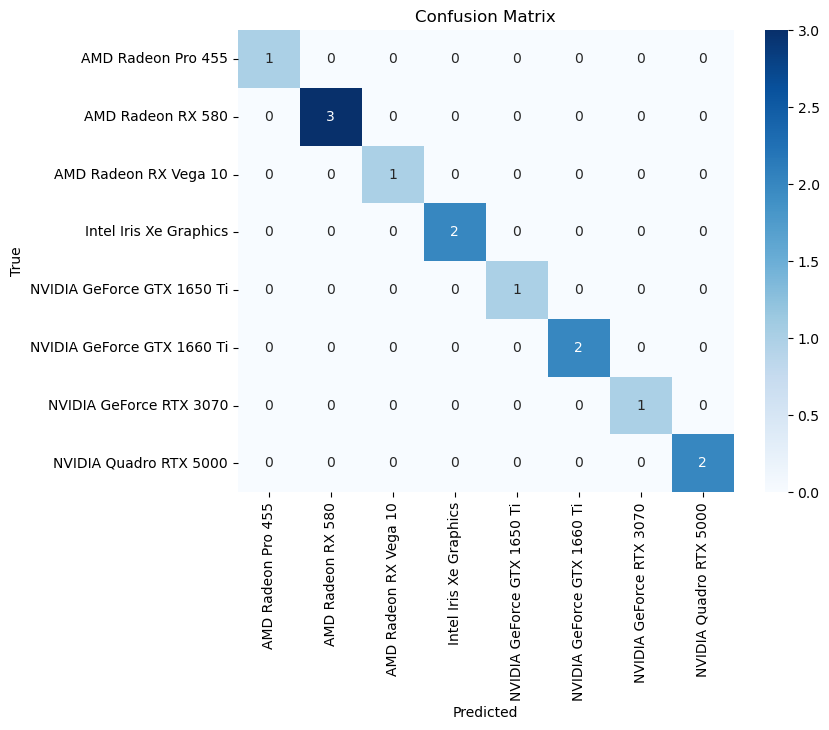

Confusion Matrix for PRICE:


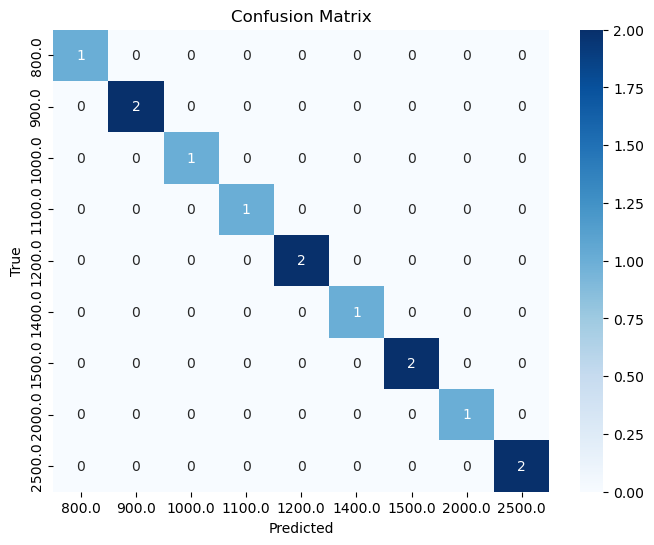

Confusion Matrix for RAM:


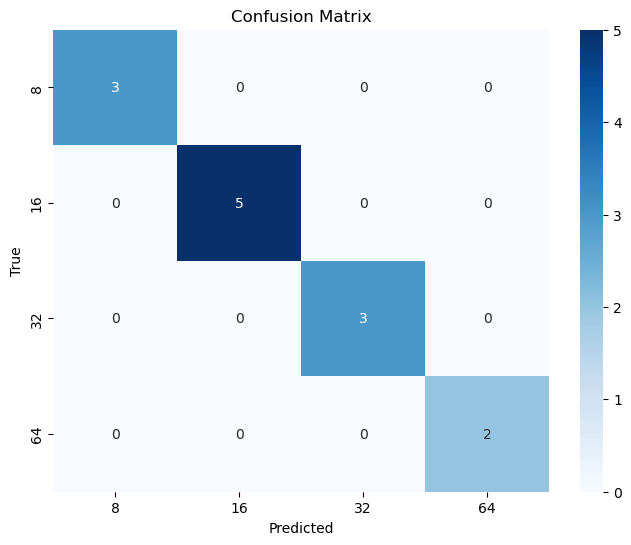

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(true_labels, predicted_labels, labels):
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Compute confusion matrix for GPU, price, and RAM extraction
for label in ["GPU", "PRICE", "RAM"]:
    print(f"Confusion Matrix for {label}:")
    unique_labels = set(true_labels[label] + predicted_labels[label])
    plot_confusion_matrix(true_labels[label], predicted_labels[label], labels=sorted(unique_labels))